<!-- <img src="img/title_01.png"> -->

<img src="img/hello_fedgis_notebook.jpg">

# Hello, FedGIS

In [8]:
1+2

3

In [9]:
import arcgis

In [10]:
gis = arcgis.gis.GIS(url="https://ndirt.maps.arcgis.com", username="ANieto_ndirt")

Enter password: ········


In [11]:
m = gis.map('Washington DC')
m

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

# Anyone a fan of brutalist architecture? 

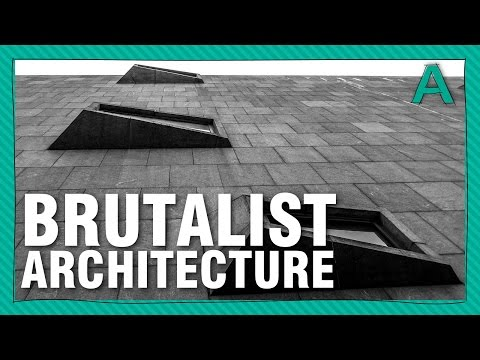

In [12]:
YouTubeVideo('VGwVAxRHxgM', width=800, height=600, autoplay=True, start=53, controls=0)

# Let's take a tour of Washington DC's brutalist Federal buildings

<!-- <tr><td><img src="img/brutalist01.JPG" style="width: 500px"/><img src="img/brutalist03.JPG" style="width: 500px"/><img src="img/brutalist02.JPG" style="width: 500px"/></td> -->

|DC Metro|FBI Headquarters|HUD Building|
|:----:|:----:|:----:|
|![](img/brutalist01.JPG)|![](img/brut03.JPG)|![](img/brutalist03.JPG)|

<Item title:"Federal_Buildings_Brutalist_Architecture" type:Feature Layer Collection owner:ANieto_ndirt>
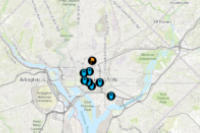

In [13]:
items = gis.content.search("Brutalist Buildings", item_type="feature layer")
for item in items:
    display(item)

In [14]:
federal_buildings = items[0]

m2 = gis.map('Washington DC', zoomlevel=12)
m2.basemap = "gray-vector"

display(m2)

m2.add_layer([federal_buildings])

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

## Analysis - Let's plot the best tour route to each building

#### Setup

In [ ]:
from IPython.display import YouTubeVideo

In [ ]:
import time

def visualize_find_routes_results(map_widget, find_routes_result, stops_layer, zoom_level, iterations=1):
    # The map widget
    m = map_widget
    m.basemap = 'dark-gray-vector'
    # The find_routes result
    result = find_routes_result
    
    # 1. Parse the find-routes analysis results
    # Extract the output data from the analysis results
    # Store the output points and lines in pandas dataframes
    lines_df = result.output_routes.df
    lines_fset = arcgis.features.FeatureSet.from_dataframe(lines_df)
    
    # 2. Define the map symbology
    # Allocation lines
    allocation_line_symbol_1 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [255,255,255,153], 'width': 0.7}

    allocation_line_symbol_2 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,255,197,39], 'width': 3}

    allocation_line_symbol_3 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,197,255,39], 'width': 5}
    
    allocation_line_symbol_4 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,92,230,39], 'width': 7}
    
    time.sleep(1.5)
    
    m.add_layer(stops_layer)
    
    for iteration in range(iterations):
        m.draw(shape=result.output_routes, symbol=allocation_line_symbol_4)
        m.draw(shape=result.output_routes, symbol=allocation_line_symbol_2)
        m.draw(shape=result.output_routes, symbol=allocation_line_symbol_1)
    
    m.zoom = zoom_level

In [ ]:
federal_architecture_tour_route = arcgis.network.analysis.find_routes(federal_buildings.layers[0].query(),
                                                                      reorder_stops_to_find_optimal_routes=True,
                                                                      travel_mode="Walking Time",
                                                                      impedance="Walk Time",
                                                                      gis=gis)

### Brutalist Architectural Tour of DC

In [ ]:
arcgis.network.analysis.find_routes?

In [ ]:
federal_architecture_tour_route = arcgis.network.analysis.find_routes(federal_buildings.layers[0].query(),
                                                                      reorder_stops_to_find_optimal_routes=True,
                                                                      travel_mode="Walking Time",
                                                                      impedance="Walk Time",
                                                                      gis=gis)

In [ ]:
federal_architecture_tour_route.output_directions.df

In [ ]:
tour_map = gis.map('Washington Convention Center', zoomlevel=11)
tour_map

In [ ]:
visualize_find_routes_results(tour_map, federal_architecture_tour_route, federal_buildings, zoom_level=13, iterations=5)

#### TODO - Add images, animation of stops

In [ ]:
m.add_layer(routes_layer)
m.add_layer(assigned_stops_layer)